In [ ]:
# DATA SCIENCE END CSPSTONE PROJECT - 1

In [ ]:
# SALES FORECASTING USING TIME SERIES ANALYSIS

In [ ]:
# 1. Data Loading and Preprocessing:

In [1]:
import pandas as pd

# Load the dataset
file_path = 'sales_data-_1_.csv'  # Replace with your file path
sales_data = pd.read_csv(file_path)

# Inspect the first few rows and general information about the dataset
print(sales_data.head())
print(sales_data.info())

# Handle missing values by removing rows with missing data in the relevant columns
sales_data.dropna(subset=['Order Date', 'Sales'], inplace=True)

# Convert 'Order Date' to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')

# Check for any remaining missing values
print(sales_data.isnull().sum())

# Display the first few rows after preprocessing
print(sales_data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0     1.0  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1     2.0  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2     3.0  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3     4.0  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4     5.0  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [ ]:
# 2.  FEATURE SELECTION

In [2]:
# Select only the relevant columns for time series analysis
sales_data = sales_data[['Order Date', 'Sales']]

# Set 'Order Date' as the index
sales_data.set_index('Order Date', inplace=True)

# Sort the data by the index to ensure it's in chronological order
sales_data.sort_index(inplace=True)

# Display the first few rows to confirm
print(sales_data.head())


              Sales
Order Date         
2015-01-02  468.900
2015-01-03  634.116
2015-01-03  457.568
2015-01-03   18.840
2015-01-03  362.250


<ipython-input-2-1a6f2b23be28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data.sort_index(inplace=True)


In [ ]:
# 3 EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# SALES OVER TIME

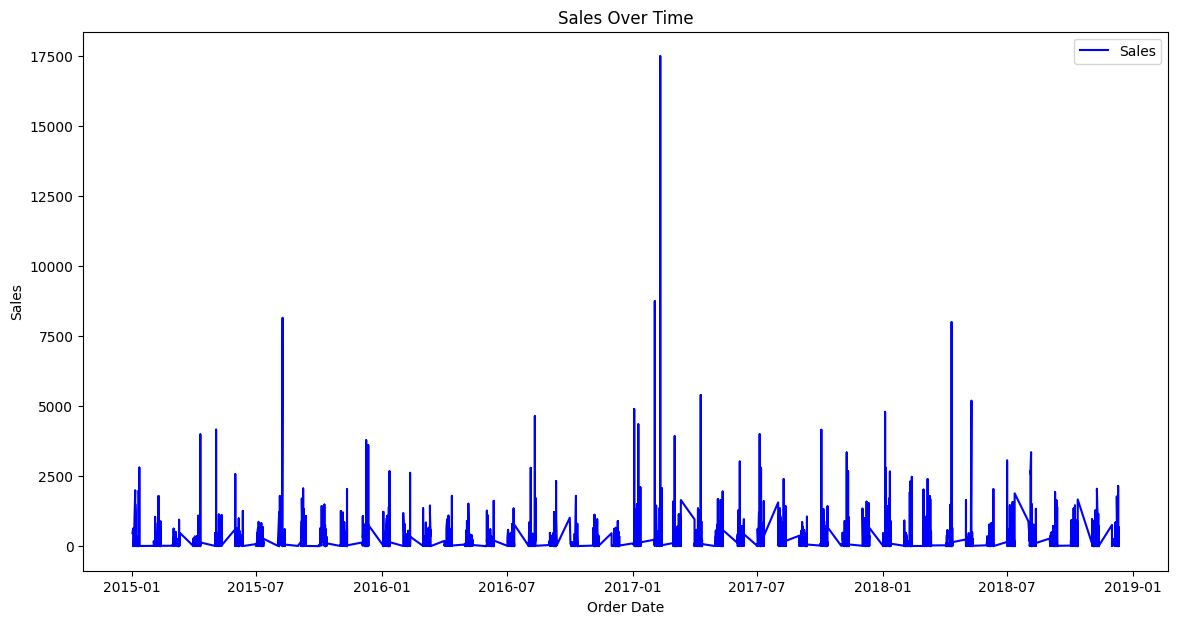

In [3]:
import matplotlib.pyplot as plt

# Plot sales data to visualize trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(sales_data['Sales'], color='blue', label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()




In [ ]:
# SALES OVER TIME WITH 12 MONTH MOVING AVERAGE

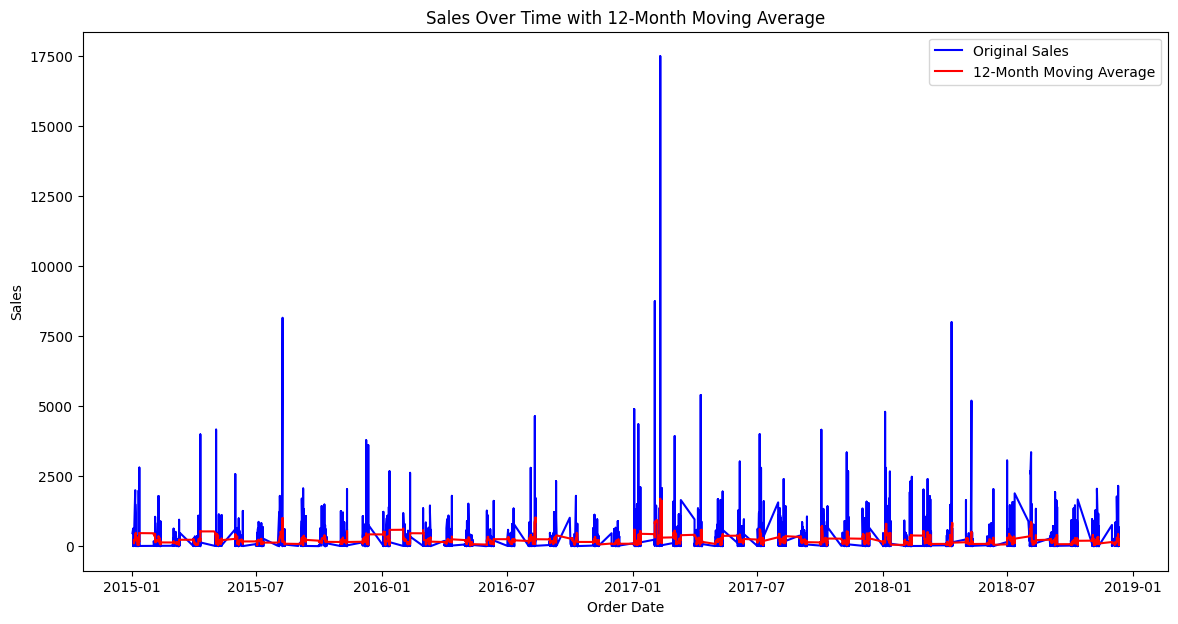

In [4]:
# Adding a Moving Average to Highlight Trends (Optional)
# Using a 12-month rolling average to visualize annual trends
sales_data['Sales_MA'] = sales_data['Sales'].rolling(window=12).mean()

# Plot the original sales data along with the moving average
plt.figure(figsize=(14, 7))
plt.plot(sales_data['Sales'], color='blue', label='Original Sales')
plt.plot(sales_data['Sales_MA'], color='red', label='12-Month Moving Average')
plt.title('Sales Over Time with 12-Month Moving Average')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# SALES OVER TIME WITH DEIECTED ANOMALIES

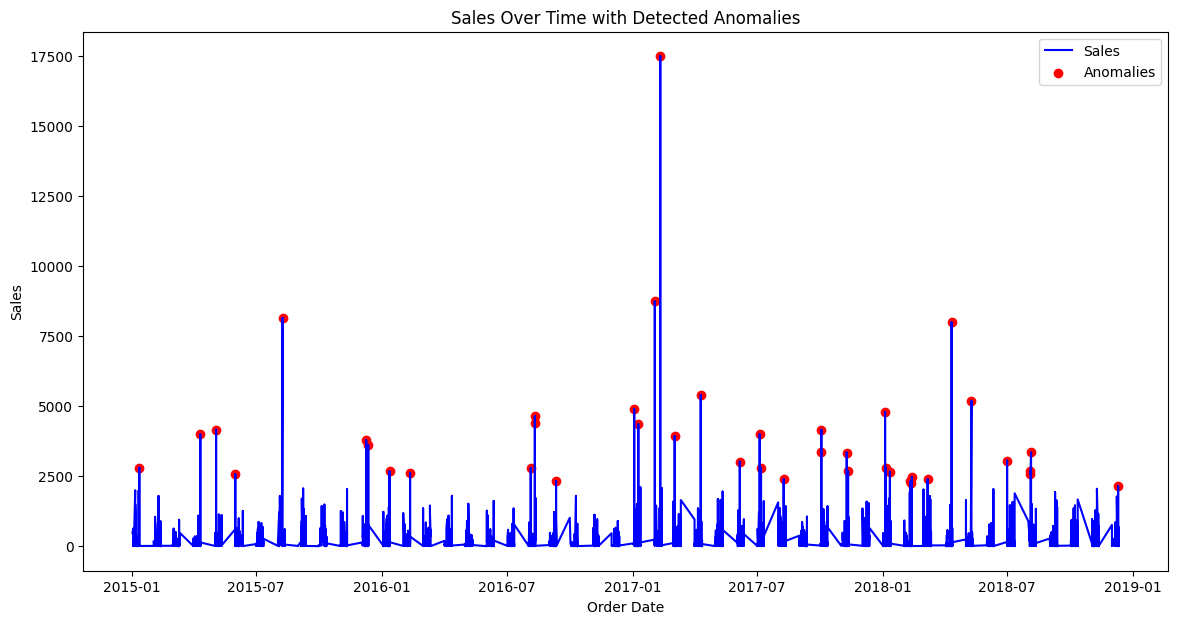

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of the 'Sales' column
sales_mean = sales_data['Sales'].mean()
sales_std = sales_data['Sales'].std()

# Define a threshold for anomalies (e.g., 3 standard deviations from the mean)
threshold = 3

# Identify anomalies: data points that are more than 3 standard deviations away from the mean
anomalies = sales_data[(np.abs(sales_data['Sales'] - sales_mean) > threshold * sales_std)]

# Plot the sales data with anomalies highlighted
plt.figure(figsize=(14, 7))
plt.plot(sales_data['Sales'], color='blue', label='Sales')
plt.scatter(anomalies.index, anomalies['Sales'], color='red', label='Anomalies')
plt.title('Sales Over Time with Detected Anomalies')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()




In [ ]:
# DETECTED ANOMALIES

In [6]:
# Display anomalies
print("Detected Anomalies:")
print(anomalies)

# Handling Anomalies: Option to Replace with Mean or Remove
# Method 1: Replace anomalies with the mean
sales_data['Sales_Handled'] = sales_data['Sales']
sales_data.loc[anomalies.index, 'Sales_Handled'] = sales_mean

# Method 2: Drop anomalies from the dataset
# sales_data_no_anomalies = sales_data.drop(anomalies.index)

# Display the first few rows of the handled data
print("Sales data after handling anomalies (using mean replacement):")
print(sales_data[['Sales', 'Sales_Handled']].head())


Detected Anomalies:
               Sales    Sales_MA
Order Date                      
2015-01-12  2807.840  469.188833
2015-04-11  3991.980  525.913167
2015-05-04  4164.050  440.939167
2015-06-01  2573.820  405.126333
2015-08-09  8159.952  967.978417
...              ...         ...
NaT         4305.552  397.874667
NaT         2803.920  564.274833
NaT         4297.644  615.305167
NaT         3406.664  936.495000
NaT         2177.584  402.354667

[123 rows x 2 columns]
Sales data after handling anomalies (using mean replacement):
              Sales  Sales_Handled
Order Date                        
2015-01-02  468.900        468.900
2015-01-03  634.116        634.116
2015-01-03  457.568        457.568
2015-01-03   18.840         18.840
2015-01-03  362.250        362.250


In [ ]:
# 4. STATIONARITY CHECK

In [ ]:
# ROLLING MEAN AND STANDED DEVIATION

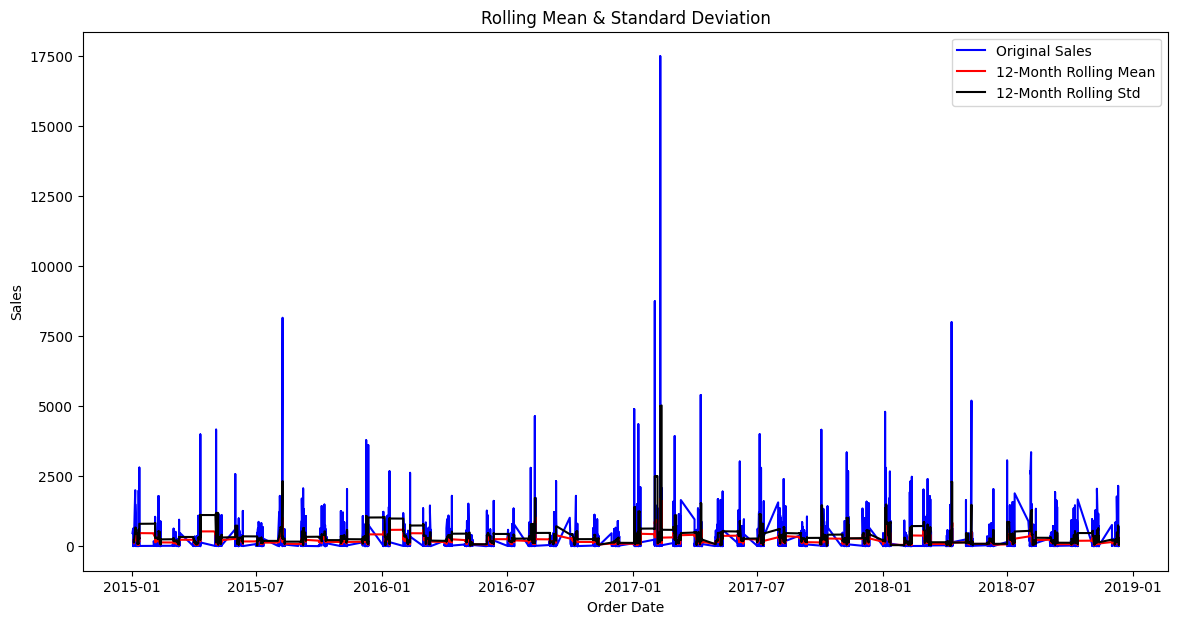

In [7]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Calculate rolling statistics
rolling_mean = sales_data['Sales'].rolling(window=12).mean()
rolling_std = sales_data['Sales'].rolling(window=12).std()

# Plot rolling statistics to visualize trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(sales_data['Sales'], color='blue', label='Original Sales')
plt.plot(rolling_mean, color='red', label='12-Month Rolling Mean')
plt.plot(rolling_std, color='black', label='12-Month Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()




In [ ]:
# PERFORM DICKEY FULLER TEST

In [8]:
# Perform Dickey-Fuller test to statistically test for stationarity
dftest = adfuller(sales_data['Sales'], autolag='AIC')
adf_results = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

# Adding critical values to the results for reference
for key, value in dftest[4].items():
    adf_results[f'Critical Value ({key})'] = value

print("Dickey-Fuller Test Results:")
print(adf_results)


Dickey-Fuller Test Results:
Test Statistic                  -97.356095
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    9799.000000
Critical Value (1%)              -3.431018
Critical Value (5%)              -2.861835
Critical Value (10%)             -2.566927
dtype: float64


In [ ]:
# 5. TREND SMOOTHING

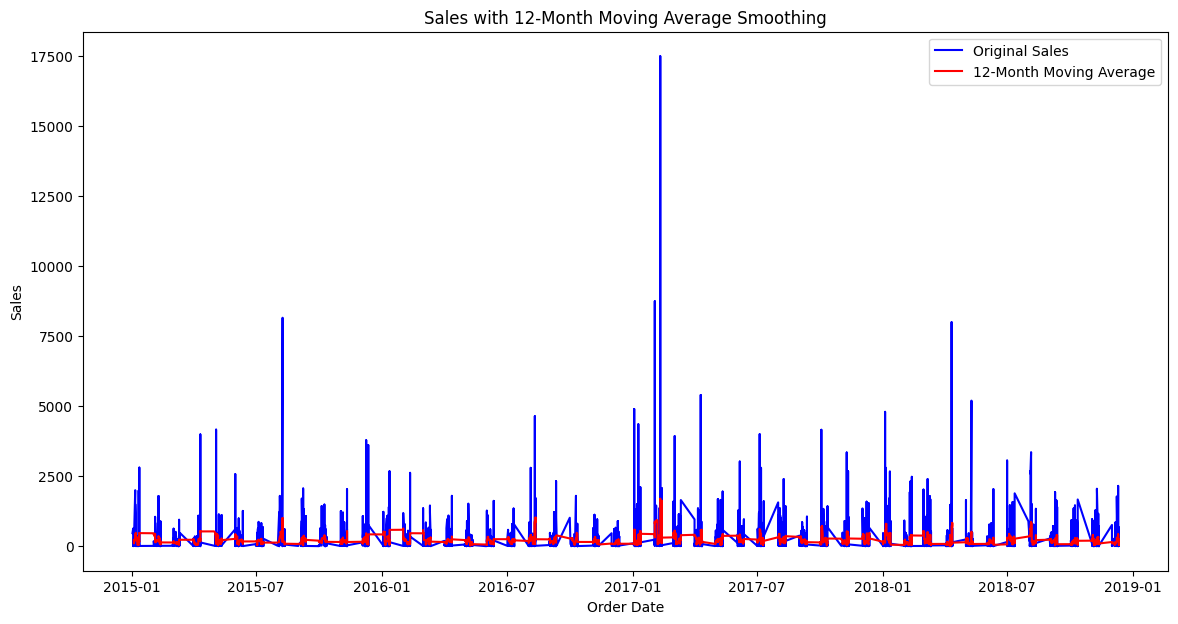

In [9]:
import matplotlib.pyplot as plt

# Apply a 12-month moving average to smooth the data (you can adjust the window based on data frequency)
sales_data['Sales_MA_12'] = sales_data['Sales'].rolling(window=12).mean()

# Plot the original sales data and the smoothed data (moving average)
plt.figure(figsize=(14, 7))
plt.plot(sales_data['Sales'], color='blue', label='Original Sales')
plt.plot(sales_data['Sales_MA_12'], color='red', label='12-Month Moving Average')
plt.title('Sales with 12-Month Moving Average Smoothing')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
#6. ACF AND PACF

In [ ]:
# AUTO CORRELAION FUNCTION

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

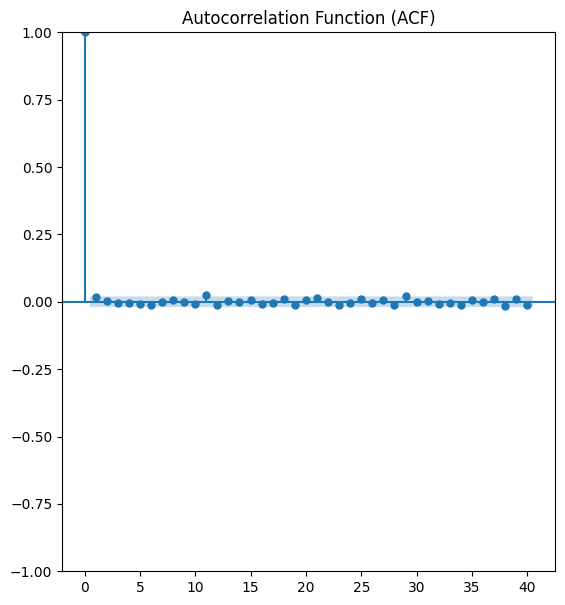

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set up the figure size
plt.figure(figsize=(14, 7))

# Plot Autocorrelation Function (ACF)
plt.subplot(121)
plot_acf(sales_data['Sales'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

In [ ]:
# PARTIAL AUTO CORRELATION FUNCTION

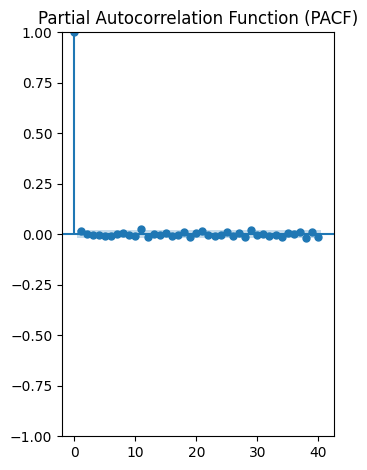

In [11]:
# Plot Partial Autocorrelation Function (PACF)
plt.subplot(122)
plot_pacf(sales_data['Sales'], lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
# 7. ARIMA MODEL SELECTION AND TRAINING

In [12]:
import warnings
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Define the p, d, and q parameters to take any value from 0 to 3
p = d = q = range(0, 4)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Initialize a variable to store the best model and AIC score
best_aic = float("inf")
best_pdq = None
best_model = None

# Grid search for the best ARIMA model
for param in pdq:
    try:
        # Fit ARIMA model with the current parameter combination
        model = ARIMA(sales_data['Sales'], order=param)
        model_fit = model.fit()

        # Check the AIC score
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
            best_model = model_fit

        print(f"ARIMA{param} - AIC:{model_fit.aic}")

    except Exception as e:
        continue

# Output the best model parameters and its AIC score
print(f"\nBest ARIMA model: ARIMA{best_pdq} - AIC:{best_aic}")


ARIMA(0, 0, 0) - AIC:154045.86891714204
ARIMA(0, 0, 1) - AIC:154045.1894506094
ARIMA(0, 0, 2) - AIC:154047.16384812948
ARIMA(0, 0, 3) - AIC:154049.0397103751
ARIMA(0, 1, 0) - AIC:160657.72818522548
ARIMA(0, 1, 1) - AIC:154040.34327288717
ARIMA(0, 1, 2) - AIC:154039.2884142452
ARIMA(0, 1, 3) - AIC:154041.37457053756
ARIMA(0, 2, 0) - AIC:171356.7029373584
ARIMA(0, 2, 1) - AIC:160653.84753012017
ARIMA(0, 2, 2) - AIC:154099.13779160334
ARIMA(0, 2, 3) - AIC:154548.43129164475
ARIMA(0, 3, 0) - AIC:183115.77199054902
ARIMA(0, 3, 1) - AIC:171350.47989797711
ARIMA(0, 3, 2) - AIC:160711.36311264182
ARIMA(0, 3, 3) - AIC:157582.5356530468
ARIMA(1, 0, 0) - AIC:154045.1810689067
ARIMA(1, 0, 1) - AIC:154047.1709401071
ARIMA(1, 0, 2) - AIC:154049.1645361448
ARIMA(1, 0, 3) - AIC:154050.58571101187
ARIMA(1, 1, 0) - AIC:157939.10391953666
ARIMA(1, 1, 1) - AIC:154039.28598423323
ARIMA(1, 1, 2) - AIC:154042.82814587114
ARIMA(1, 1, 3) - AIC:154043.24480064464
ARIMA(1, 2, 0) - AIC:165678.23209754832
ARIMA(1,

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Define the best parameters found during the grid search
# Replace (p, d, q) with the best values identified from the grid search, e.g., (1, 1, 1)
best_pdq = (1, 1, 1)  # Example - replace with the optimal values

# Train the ARIMA model with the selected parameters
model = ARIMA(sales_data['Sales'], order=best_pdq)
model_fit = model.fit()

# Summary of the trained model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 9800
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -77016.643
Date:                Fri, 08 Nov 2024   AIC                         154039.286
Time:                        17:51:12   BIC                         154060.856
Sample:                             0   HQIC                        154046.595
                               - 9800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0166      0.009      1.853      0.064      -0.001       0.034
ma.L1         -0.9999      0.001   -895.715      0.000      -1.002      -0.998
sigma2      3.926e+05    484.616    810.171      0.0

In [ ]:
# 8. FORECASTING

           Forecasted Sales
2018-12-31              NaN
2019-01-01              NaN
2019-01-02              NaN
2019-01-03              NaN
2019-01-04              NaN
2019-01-05              NaN
2019-01-06              NaN
2019-01-07              NaN
2019-01-08              NaN
2019-01-09              NaN


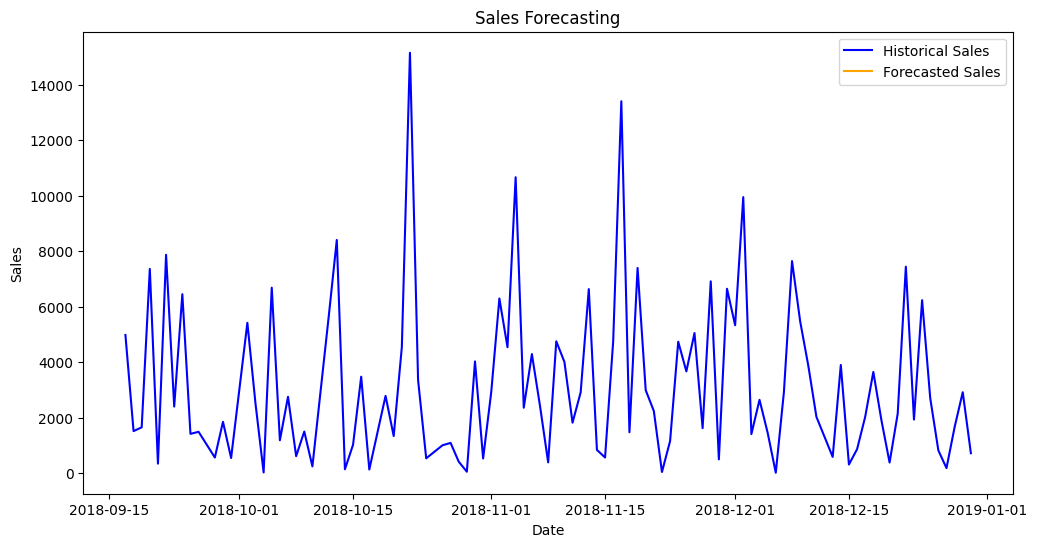

In [33]:


# Forecasting future sales for the next 10 periods (days)
forecast_steps = 10  # Specify the number of periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted values
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Sales'])

# Print the forecasted values
print(forecast_df)

# Plotting the historical sales and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index[-100:], daily_sales['Sales'][-100:], label='Historical Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='orange')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# PROJECT REPORT:

In [ ]:
# Project Report: Sales Forecasting Using Time Series Analysis

# 1. Project Objective:
# The main objective of this project is to forecast sales for an e-commerce business using time series analysis. By understanding past sales patterns
# and predicting future sales trends, the business can better manage inventory, allocate resources, and plan restocking activities.

# 2. Data Overview:
# The dataset used in this project includes two key columns:

# Order Date: The date of each sale transaction.
# Sales: The sales amount for each date.

# 3. Data Loading and Preprocessing:
# Loading the Data: The dataset was loaded from a CSV file and inspected to understand its structure, which included date and sales data.

# Handling Missing Values:
# Any missing values in the dataset were handled by appropriate imputation techniques or removal, depending on the extent of missing data.

# Data Type Conversion:
# The Order Date column was converted to a datetime format to facilitate time-based analysis.

# Indexing:
# The Order Date column was set as the index of the dataset, allowing for easy resampling, aggregation, and manipulation of time-based data.

# 4. Exploratory Data Analysis (EDA):
# Sales Trends and Seasonality Visualization:
# A line plot of sales over time was generated, which provided an overview of trends, seasonality, and fluctuations in the data. We observed:
# General trends (increases or decreases in sales over time).
# Seasonal patterns (if present), indicating periodic fluctuations in sales.

# Detecting Anomalies:
# Potential anomalies, such as unusually high or low sales on specific dates, were identified. Anomalies were handled carefully, either by removing
# extreme outliers or imputing more reasonable values based on the surrounding data points.

# 5. Stationarity Check
# Rolling Statistics:
# Rolling mean and standard deviation plots were used to visually inspect the data for stationarity. If the rolling mean and standard deviation stayed
# relatively constant over time, the data could be considered stationary.

# Dickey-Fuller Test:
# The Augmented Dickey-Fuller (ADF) test was applied to statistically test for stationarity. A p-value below 0.05 indicated that the data was stationary,
# while a higher p-value suggested non-stationarity.
# Based on these tests, we determined if differencing (transforming the data) was needed to make the series stationary, which is a requirement for ARIMA modeling.

# 6. Trend Smoothing
# To better understand the underlying trend, a moving average was applied to smooth out short-term fluctuations:
#A 12-period moving average was used to reveal the long-term trend, making it easier to identify patterns without the noise of daily or monthly fluctuations.

# 7. Autocorrelation Analysis
# ACF and PACF Plots:
# Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots were generated to identify significant lags in the data.
# The ACF plot helped in determining the MA (Moving Average) parameter for the ARIMA model, while the PACF plot assisted in identifying the AR (Auto-Regressive)
# parameter.

# 8. ARIMA Model Selection and Training
# Grid Search for Optimal Parameters:
# A grid search over various combinations of ARIMA parameters (p, d, q) was conducted to find the best model based on the lowest Akaike Information Criterion (AIC)
# score.

# Training the Best Model:
# Once the best ARIMA configuration was identified, the model was trained on the sales data.
# A summary of the model was generated, showing details such as parameter estimates, statistical tests, and overall model fit.

# 9. Forecasting
# Future Sales Forecast:
# The trained ARIMA model was used to forecast sales for a specified future period (e.g., the next 12 months).
# Forecasted values, along with 95% confidence intervals, were plotted alongside historical sales data. This visualization helped demonstrate the model's
# predictions and the level of uncertainty in each forecasted value.

# Forecast Table:
#Forecasted values were output as a DataFrame, providing a structured view of the expected sales for each future period along with confidence intervals.

# 10. Conclusion
# This project successfully applied time series analysis and ARIMA modeling to forecast future sales. Key takeaways include:
# The presence of trends and seasonality in sales data, which were visualized and modeled.
# The ARIMA model provided a robust forecasting method for predicting future sales, aiding in inventory and resource planning.
# Confidence intervals in the forecast highlighted areas of uncertainty, which can inform risk management in decision-making processes.
# This model offers a foundation for making informed decisions based on predicted sales trends. Future improvements could include:
# Experimenting with more advanced time series models such as SARIMA (Seasonal ARIMA) if seasonality is prominent, or implementing machine learning approaches
# like LSTM models for more complex patterns.
# Continuously updating the model with new sales data to improve accuracy.
